In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
import os

pd.pandas.set_option("display.max_columns",None)
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/drug200.csv
./data/data_model.csv
./data/data_model


In [5]:
data = pd.read_csv('./data/data_model.csv')
t = 'Drug'
data

,Age,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,is_male
0,23,25.355,DrugY,1,0,0,1,0,0
1,47,13.093,drugC,0,1,0,1,0,1
2,47,10.114,drugC,0,1,0,1,0,1
3,28,7.798,drugX,0,0,1,1,0,0
4,61,18.043,DrugY,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,0,1,0,1,0,0
196,16,12.006,drugC,0,1,0,1,0,1
197,52,9.894,drugX,0,0,1,1,0,1
198,23,14.020,drugX,0,0,1,0,1,1


In [7]:
X = data.drop("Drug",1)
y = data['Drug']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=26,test_size=.3)

In [10]:
print(f"the dimension is of xtrain: {xtrain.shape}")
print(f"the dimension is of xtest: {xtest.shape}")
print(f"the dimension is of ytrain: {ytrain.shape}")
print(f"the dimension is of ytest: {ytest.shape}")

the dimension is of xtrain: (140, 8)
the dimension is of xtest: (60, 8)
the dimension is of ytrain: (140,)
the dimension is of ytest: (60,)


In [21]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## LETS OPTIMIZE THE KNN

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
pred = knn.predict(xtest)
score = model.score(xtest,ytest)
print(knn,score)

KNeighborsClassifier(n_neighbors=3) 0.65


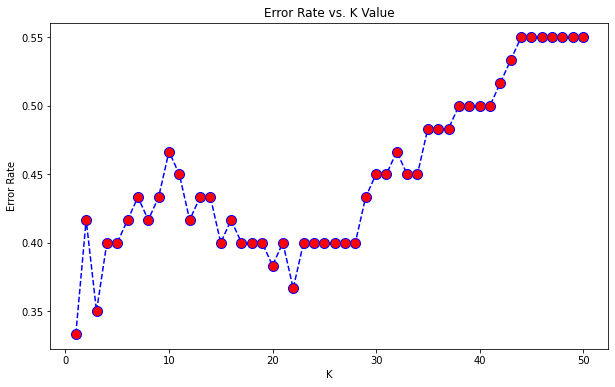

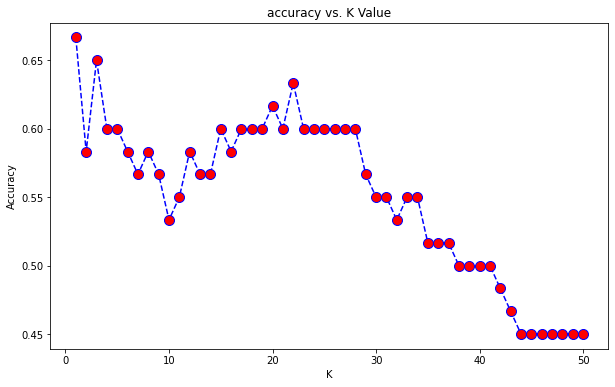

In [48]:
error = []
score = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred = knn.predict(xtest)
    score.append(knn.score(xtest,ytest))
    error.append(np.mean(pred != ytest))
    #print(knn,score)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,51),error,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


plt.figure(figsize=(10,6))
plt.plot(range(1,51),score,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
#print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
plt.show()

#print("Minimum error:-",min(error.values*()),"at K =",error.keys().index(min(error.keys)))


In [49]:
models = [LogisticRegression(),
          SGDClassifier(),
          KNeighborsClassifier(n_neighbors=1),
          
         ]
best = None
best_score = 0
for model in models:
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    score = model.score(xtest,ytest)
    if score > best_score:
        best = model
        best_score = score
    print(model,score)

LogisticRegression() 0.95
SGDClassifier() 0.5166666666666667
KNeighborsClassifier(n_neighbors=1) 0.6666666666666666


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [50]:
best

LogisticRegression()

In [51]:
best_pred = best.predict(xtest)

In [55]:
cm = confusion_matrix(ytest,best_pred)

<AxesSubplot:>

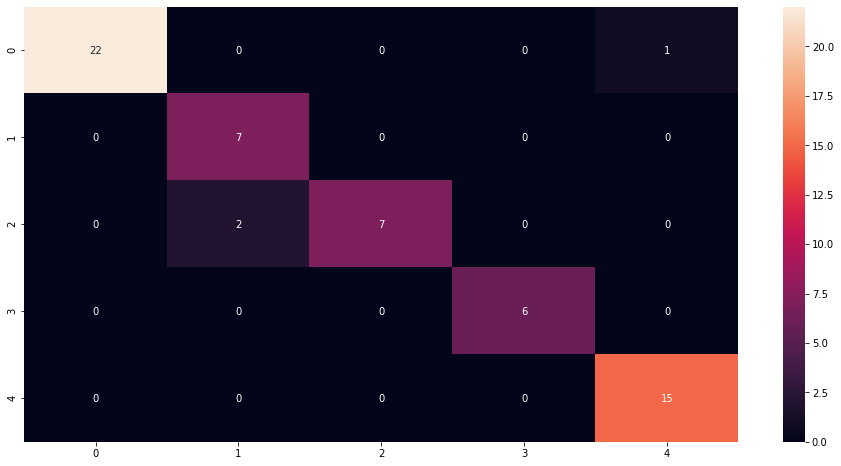

In [58]:
plt.figure(figsize=(16,8))
sns.heatmap(cm, annot=True)

In [60]:
accuracy_score(ytest,best_pred)

0.95

In [63]:
print(classification_report(ytest,best_pred))

              precision    recall  f1-score   support

       DrugY       1.00      0.96      0.98        23
       drugA       0.78      1.00      0.88         7
       drugB       1.00      0.78      0.88         9
       drugC       1.00      1.00      1.00         6
       drugX       0.94      1.00      0.97        15

    accuracy                           0.95        60
   macro avg       0.94      0.95      0.94        60
weighted avg       0.96      0.95      0.95        60

